In [47]:
# Import required modules
import cv2 as cv
import math
import time
import matplotlib.pyplot as plt


In [48]:
import cv2 as cv
import time

def getFaceBox(net, frame, conf_threshold=0.7):
    # Create a copy of the frame
    frameOpencvDnn = frame.copy()
    # Get the height and width of the frame
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    # Preprocess the frame for face detection
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    # Set the input to the network
    net.setInput(blob)
    # Forward pass through the network to obtain detections
    detections = net.forward()
    # Initialize a list to store the bounding boxes of detected faces
    bboxes = []
    for i in range(detections.shape[2]):
        # Get the confidence of the detection
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            # Calculate the coordinates of the bounding box
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            # Add the bounding box coordinates to the list
            bboxes.append([x1, y1, x2, y2])
            # Draw a rectangle around the face in the frame
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    # Return the frame with bounding boxes and the list of bounding boxes
    return frameOpencvDnn, bboxes

# Define the paths to the face detection model files
faceProto = "/Users/godzilla/Desktop/CodeClause/Task-1/modelNweight/opencv_face_detector.pbtxt"
faceModel = "/Users/godzilla/Desktop/CodeClause/Task-1/modelNweight/opencv_face_detector_uint8.pb"

# Define the paths to the age and gender prediction model files
ageProto = "/Users/godzilla/Desktop/CodeClause/Task-1/modelNweight/age_deploy.prototxt"
ageModel = "/Users/godzilla/Desktop/CodeClause/Task-1/modelNweight/age_net.caffemodel"

genderProto = "/Users/godzilla/Desktop/CodeClause/Task-1/modelNweight/gender_deploy.prototxt"
genderModel = "/Users/godzilla/Desktop/CodeClause/Task-1/modelNweight/gender_net.caffemodel"

# Define the model mean values for preprocessing
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Define the age and gender categories
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load the age, gender, and face detection networks
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

# Set the padding value for face cropping
padding = 20

def age_gender_detector(frame):
    # Read the input frame
    t = time.time()
    # Obtain the frame with bounding boxes and the list of bounding boxes
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # Crop the face region from the frame based on the bounding box
        face = frame[max(0, bbox[1]-padding):min(bbox[3]+padding, frame.shape[0]-1), max(0, bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        # Preprocess the face for gender prediction
        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        
        # Set the input to the gender network and obtain predictions
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        # Get the predicted gender from the predictions
        gender = genderList[genderPreds[0].argmax()]

        # Set the input to the age network and obtain predictions
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        # Get the predicted age group from the predictions
        age = ageList[agePreds[0].argmax()]

        # Create a label with the predicted gender and age
        label = "{},{}".format(gender, age)
        # Draw the label on the frame
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    # Return the frame with labels
    return frameFace


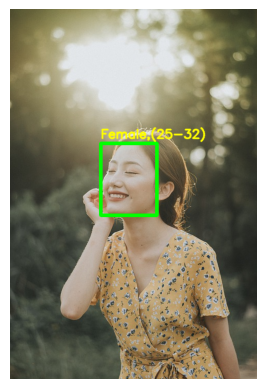

In [49]:
input = cv.imread("img4.jpeg")
output4 = age_gender_detector(input)

# Convert BGR image to RGB for proper visualization in matplotlib
output4_rgb = cv.cvtColor(output4, cv.COLOR_BGR2RGB)

# Display the output image in Jupyter Notebook
plt.imshow(output4_rgb)
plt.axis('off')  # Remove the axis labels
plt.show()

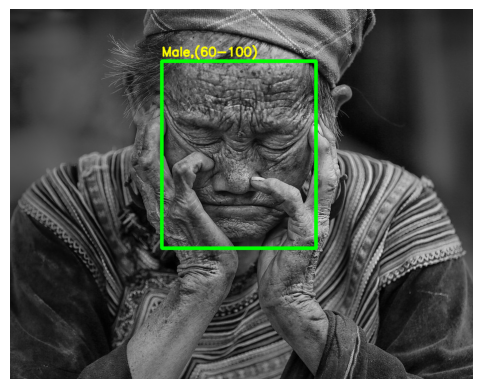

In [56]:
input = cv.imread("img1.jpeg")
output1 = age_gender_detector(input)

# Convert BGR image to RGB for proper visualization in matplotlib
output1_rgb = cv.cvtColor(output1, cv.COLOR_BGR2RGB)

# Display the output image in Jupyter Notebook
plt.imshow(output1_rgb)
plt.axis('off')  # Remove the axis labels
plt.show()

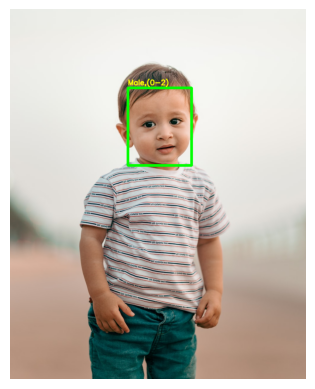

In [50]:
input = cv.imread("img5.jpeg")
output5 = age_gender_detector(input)

# Convert BGR image to RGB for proper visualization in matplotlib
output5_rgb = cv.cvtColor(output5, cv.COLOR_BGR2RGB)

# Display the output image in Jupyter Notebook
plt.imshow(output5_rgb)
plt.axis('off')  # Remove the axis labels
plt.show()

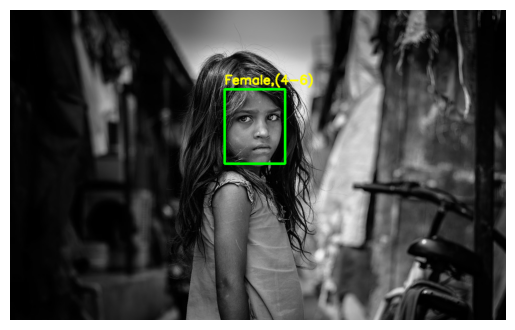

In [51]:
input = cv.imread("img2.jpeg")
output2 = age_gender_detector(input)

# Convert BGR image to RGB for proper visualization in matplotlib
output2_rgb = cv.cvtColor(output2, cv.COLOR_BGR2RGB)

# Display the output image in Jupyter Notebook
plt.imshow(output2_rgb)
plt.axis('off')  # Remove the axis labels
plt.show()